##### [ ML - 생선 분류 모델 만들기 1 ]
- 주  제 : 2개 종류 생선 분류 모델 만들기
- 학습종류 : 지도 학습 => 분류
- 학습방법 : 다양한 알고리즘들 => kNN 최근접 이웃 알고리즘

- ML 파라미터
    * 하이퍼 파라미터(Hyper-Parameter) 
        - 모델 성능을 좌우하는 파라미터
        - 학습 알고리즘마다 다름
        - 개발자가 **직접 최적의 값을 찾아야함** => **튜닝**
    * 모델파라미터(Model-Parameter)
        - 학습 후 데이터셋에 맞게 설정되는 파라미터
        - 학습 알고리즘마다 다름
        - 모델 클래스에서 자동 설정 함 => fit() 메서드 실행 후 확인 가능함!
        - 파라미터이름_ : 일반적으로 이름 형태

[1] 데이터 확인 : 피쳐와 타겟 <HR>

In [1]:
## [1] 모률 로딩 데이터 확인
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 학습 알고리즘 모델
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## [1-2] 데이터 로딩 및 빙어와 도미 데이터만 추출
data_file = '../Data/fish.csv'

## 품종, 무게, 길이 컬럼만 추출
allDF = pd.read_csv(data_file, usecols=[0,1,2])
display(allDF.head())

## bream도미, smelt빙어 행만 추출
fishDF = allDF[(allDF.Species == 'Bream') | (allDF.Species == 'Smelt')]

## 행인덱스 초기화
fishDF.reset_index(drop=True, inplace=True)


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [3]:
## 품종 컬럼 타입 변환 저장

speciesSR = fishDF.Species
fishDF.Species=speciesSR.astype('category')

C:\Users\kdt008\AppData\Local\Temp\ipykernel_21768\210443416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishDF.Species=speciesSR.astype('category')


In [4]:
## 전체 데이터 타입 확인
fishDF.info()

## 카테고리 접근자 cat 사용
print(f'[categories] => {fishDF.Species.cat.categories}')
print(f'[codes] => \n{fishDF.Species.cat.codes}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  49 non-null     category
 1   Weight   49 non-null     float64 
 2   Length   49 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 1.1 KB
[categories] => Index(['Bream', 'Smelt'], dtype='object')
[codes] => 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
dtype: int8


[2] 피쳐/데이터와 타겟/라벨 분리<hr>

In [5]:
## 학습용 피쳐/데이터와 타겟/라벨 분리
## -> 피쳐/데이터 : 2D 
featureDF = fishDF[fishDF.columns[1:]]

## -> 타겟/라벨 : 1D
targetSR = fishDF[fishDF.columns[0]]

print(f'featureDF : {featureDF.ndim}D, targetSR : {targetSR.ndim}D, ')

featureDF : 2D, targetSR : 1D, 


[3] 학습진행 <hr>
- 학습 알고리즘의 기본 설정값 그대로 학습 진행 => 성능 점수 : 베이스 점수/ 최저점수/ 기준 점수
- 성능 향상 위한 하이퍼 파라미터 값 변경 및 최적의 값 찾기

In [10]:
fishDF.shape[0]

49

In [7]:
scoreList = []
## 최적 성능의 k 즉, n_neighbors 찾기
for k in range(1, fishDF.shape[0] + 1) : 

    ## - 모델 인스턴스 생성
    kModel = KNeighborsClassifier(n_neighbors=k)
    
    ## - 모델 학습
    kModel.fit(featureDF, targetSR)
    
    ## - 모델 성능 평가
    score = kModel.score(featureDF, targetSR)
    scoreList.append(score)
    print(f'{k} score : {score:.6f}')


1 score : 1.000000
2 score : 1.000000
3 score : 1.000000
4 score : 1.000000
5 score : 1.000000
6 score : 1.000000
7 score : 1.000000
8 score : 1.000000
9 score : 1.000000
10 score : 1.000000
11 score : 1.000000
12 score : 1.000000
13 score : 1.000000
14 score : 1.000000
15 score : 1.000000
16 score : 1.000000
17 score : 1.000000
18 score : 1.000000
19 score : 0.979592
20 score : 1.000000
21 score : 0.979592
22 score : 0.979592
23 score : 0.979592
24 score : 0.979592
25 score : 0.979592
26 score : 0.979592
27 score : 0.979592
28 score : 0.714286
29 score : 0.714286
30 score : 0.714286
31 score : 0.714286
32 score : 0.714286
33 score : 0.714286
34 score : 0.714286
35 score : 0.714286
36 score : 0.714286
37 score : 0.714286
38 score : 0.714286
39 score : 0.714286
40 score : 0.714286
41 score : 0.714286
42 score : 0.714286
43 score : 0.714286
44 score : 0.714286
45 score : 0.714286
46 score : 0.714286
47 score : 0.714286
48 score : 0.714286
49 score : 0.714286


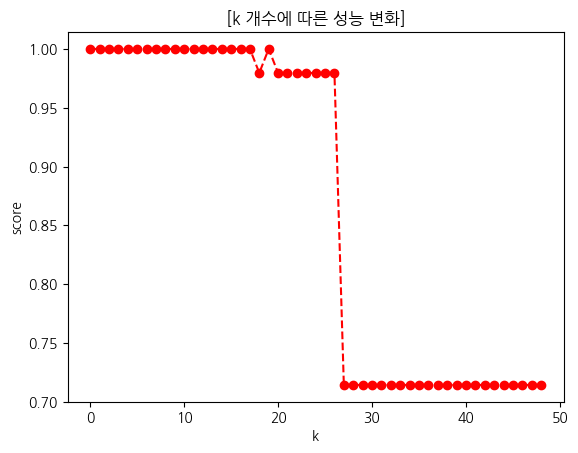

In [9]:
## k 개수에 따른 점수 시각화
plt.plot(scoreList, 'ro--')
plt.xlabel('k')
plt.ylabel('score')
plt.title('[k 개수에 따른 성능 변화]')
plt.show()

[4] 평가진행 : 테스트용 데이터/피쳐와 타겟 <hr>
- 학습용 데이터 평가 결과, 테스트용 데이터 평가결과 비교

In [8]:
kModel.score(featureDF, targetSR)

1.0

[5] 모델 활용 서비스 <hr>

In [ ]:
# ## 아모 도미 또는 빙어의 길이/무게 ==> 도미와 빙어 예측
# new_data=pd.DataFrame([[278.3, 29.]], columns=fishDF.columns[1:])
# kModel.predict(new_data)

array(['Bream'], dtype=object)

In [ ]:
# w = input("생선의 무게 입력 :")
# l = input("생선의 길이 입력 :")

# new_data=pd.DataFrame([[w, l]], columns=fishDF.columns[1:])

# print(kModel.predict(new_data))
